In [439]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [440]:
image = cv2.imread('sar_2_color.jpg')

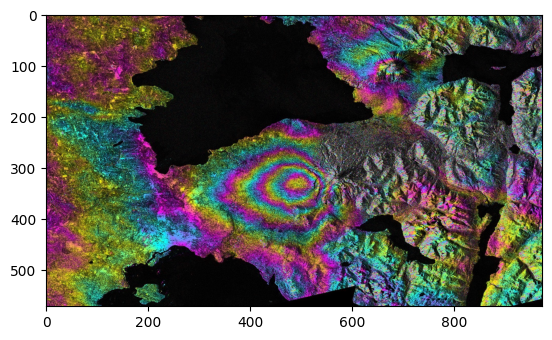

In [441]:
plt.imshow(image)

In [442]:
image.shape # h,w,c

(572, 974, 3)

In [443]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [444]:
# ROI
img_roi = image[100:200, 500:700]

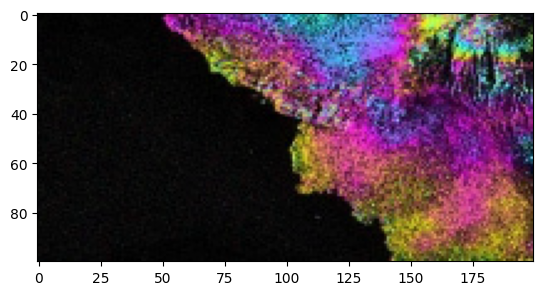

In [445]:
plt.imshow(img_roi)

In [446]:
b,g,r = cv2.split(image)

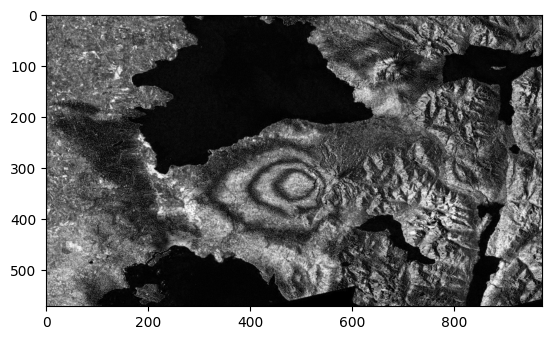

In [447]:
plt.imshow(b, cmap = 'gray')

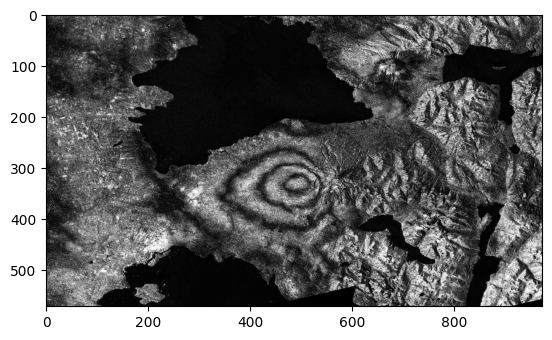

In [448]:
plt.imshow(g, cmap = 'gray')

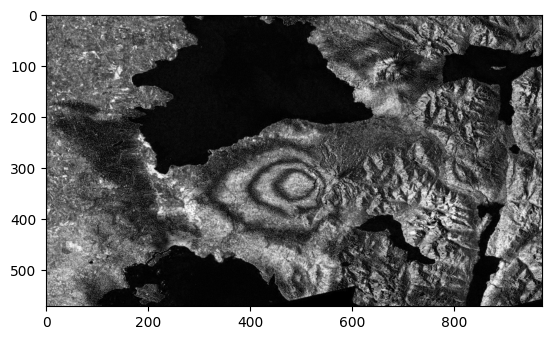

In [449]:
# alternative approach
b = image[:,:,0]
plt.imshow(b, cmap='gray')

In [450]:
import copy

image2 = copy.deepcopy(image)

In [451]:
image2[50:100,50:100] = [0,0,0]

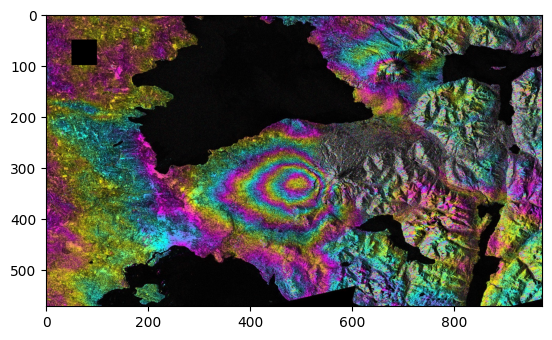

In [452]:
plt.imshow(image2)

In [453]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

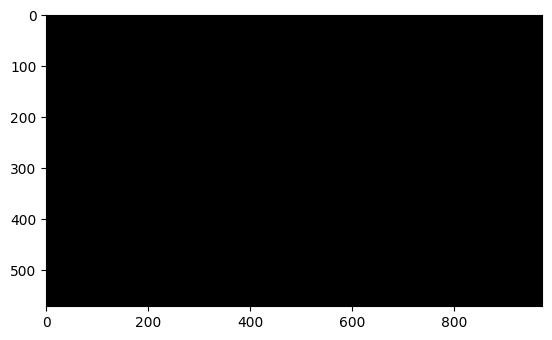

In [454]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [455]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [456]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [457]:
image_gray[0,0]

np.uint8(40)

In [458]:
image_gray.shape

(572, 974)

In [459]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [460]:
image_hsv.shape

(572, 974, 3)

In [461]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [462]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [463]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [464]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [465]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

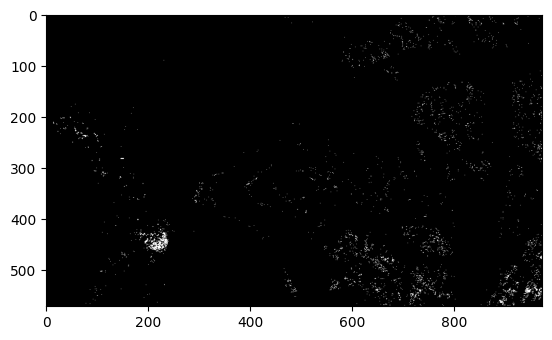

In [466]:
plt.imshow(thresh1, cmap='gray')

In [467]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [468]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

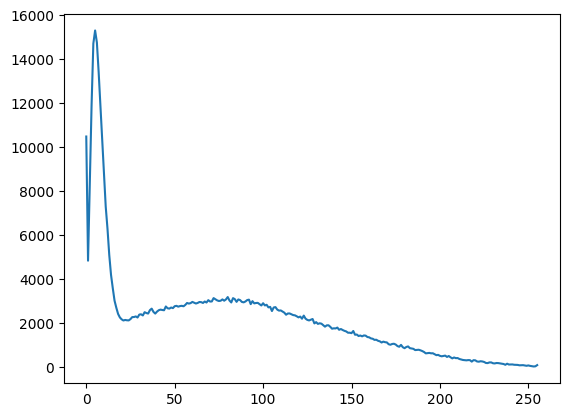

In [469]:
plt.plot(b_hist)

In [470]:
b_hist_cum = b_hist.cumsum()

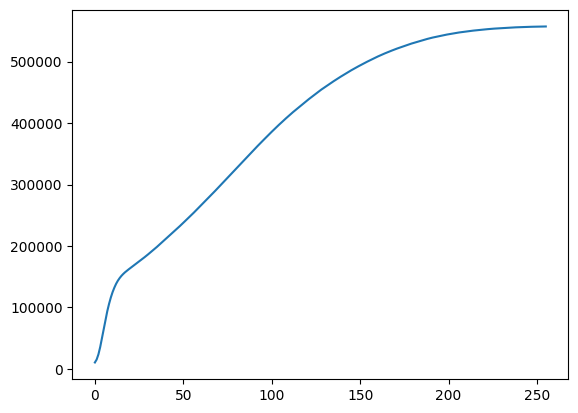

In [471]:
plt.plot(b_hist_cum)

In [472]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

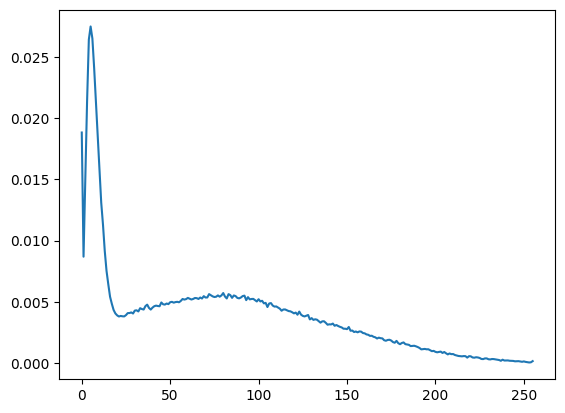

In [473]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [474]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


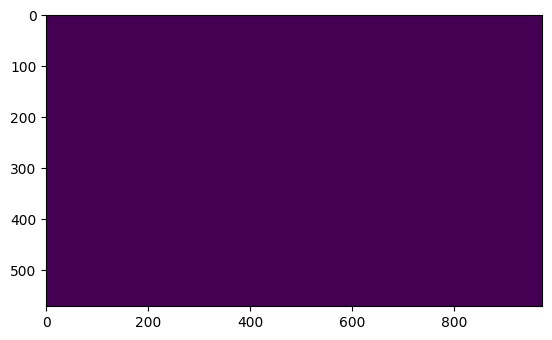

In [475]:
plt.imshow(diff)

In [476]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [477]:
mean = image_gray.mean()

In [478]:
std = image_gray.std()

In [479]:
print(mean,std)

67.41225535245043 52.016191875959635


In [480]:
eq_gray = cv2.equalizeHist(image_gray)

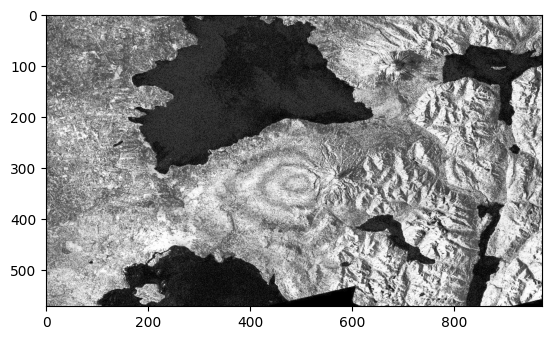

In [481]:
plt.imshow(eq_gray, cmap="gray")


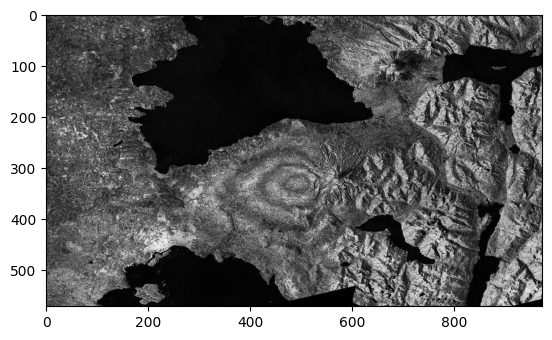

In [482]:
plt.imshow(image_gray, cmap="gray")

In [483]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


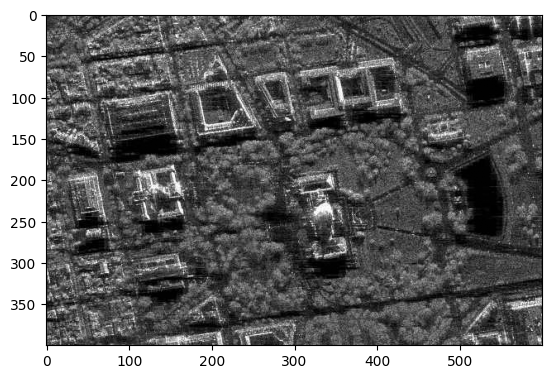

In [484]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
image_gray = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image_gray, cmap='gray')
plt.show()

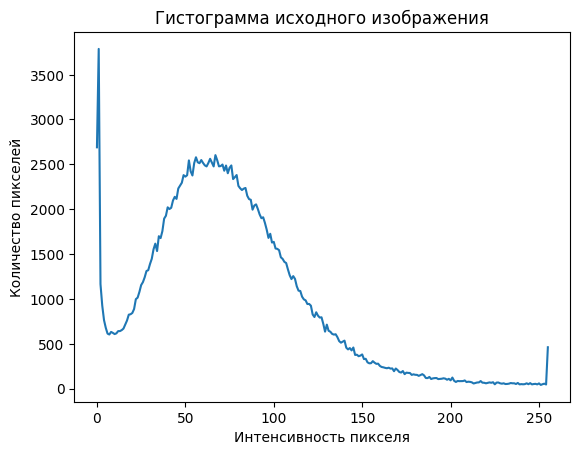

In [485]:
# 2. постройте гистограмму
hist_size = 256
hist_range = (0, 256)
    
b_hist = cv2.calcHist([image_gray], [0], None, [hist_size], hist_range, accumulate=False)
plt.plot(b_hist)
plt.title('Гистограмма исходного изображения')
plt.xlabel('Интенсивность пикселя')
plt.ylabel('Количество пикселей')

plt.show()

In [486]:
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
def gamma_correction(image, gamma = 1.0):
    image_normalized = image / 255.0
    image_corrected = np.power(image_normalized, gamma)
    return np.uint8(image_corrected * 255)

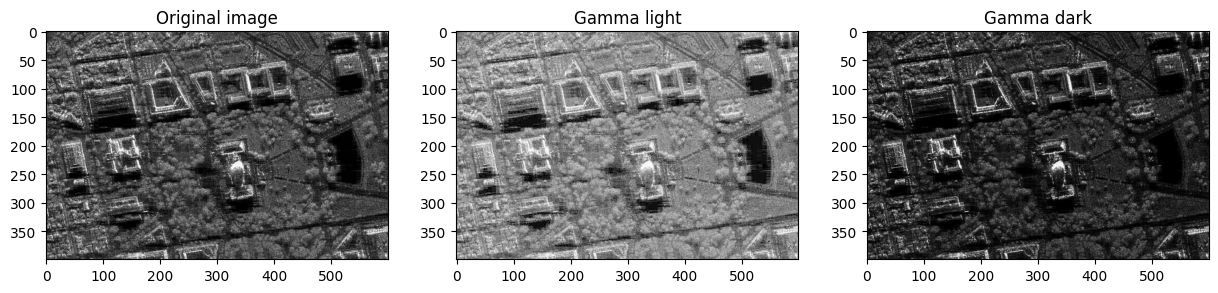

In [ ]:
gamma_low = 0.5
gamma_high = 1.5
    
image_gamma_low = gamma_correction(image_gray, gamma_low)
image_gamma_high = gamma_correction(image_gray, gamma_high)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_gray, cmap='gray')
axs[0].set_title('Original image')

axs[1].imshow(image_gamma_low, cmap='gray')
axs[1].set_title(f'Gamma light')

axs[2].imshow(image_gamma_high, cmap='gray')
axs[2].set_title(f'Gamma dark')

plt.show()

Original vs Gamma light
	SSIM: 0.7875008686792753
	MSE: 3250.429145833333
Original vs Gamma dark
	SSIM: 0.8065788107754002
	MSE: 971.8206541666667


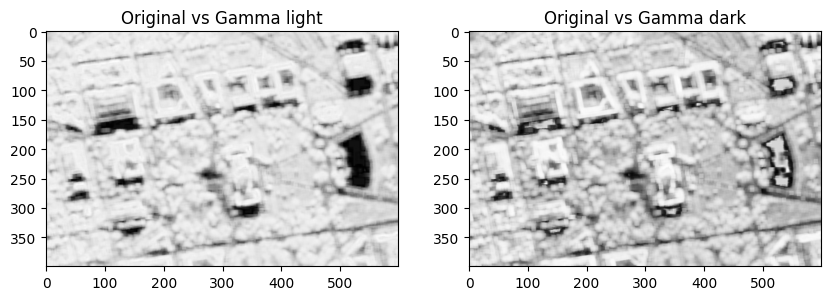

In [496]:
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

from skimage.metrics import structural_similarity, mean_squared_error

# low gamma
mse_gamma_low = mean_squared_error(image_gray, image_gamma_low)
(ssim_light, diff_light) = structural_similarity(image_gray, image_gamma_low, full=True)
diff_light = (diff_light * 255).astype("uint8")
print("Original vs Gamma light")
print(f"\tSSIM: {ssim_light}")
print(f"\tMSE: {mse_gamma_low}")

# high gamma
mse_gamma_high = mean_squared_error(image_gray, image_gamma_high)
(ssim_dark, diff_dark) = structural_similarity(image_gray, image_gamma_high, full=True)
diff_dark = (diff_dark * 255).astype("uint8")
print("Original vs Gamma dark")
print(f"\tSSIM: {ssim_dark}")
print(f"\tMSE: {mse_gamma_high}")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(diff_light, cmap='gray')
axs[0].set_title('Original vs Gamma light')

axs[1].imshow(diff_dark, cmap='gray')
axs[1].set_title('Original vs Gamma dark')

plt.show()

In [497]:
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
def statistical_color_correction(image, reference):
    mean_src, std_src = image.mean(), image.std()
    mean_ref, std_ref, = reference.mean(), reference.std()

    corrected = (image - mean_src) * (std_ref / std_src) + mean_ref
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)
    return corrected

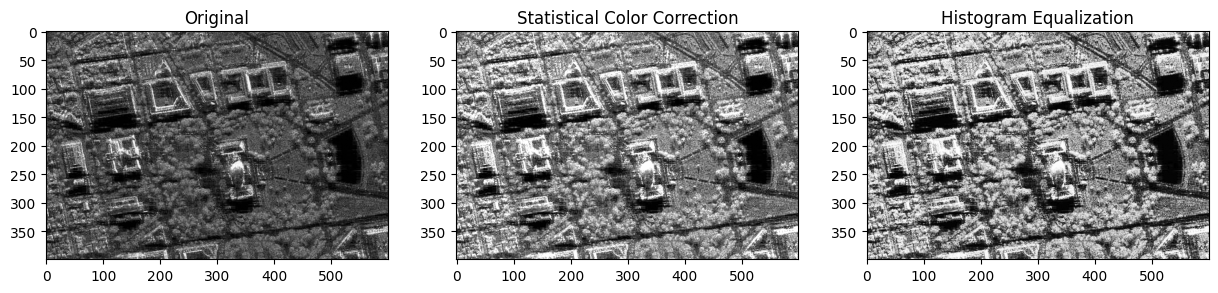

In [ ]:
eq_gray = cv2.equalizeHist(image_gray)
corrected = statistical_color_correction(image_gray, eq_gray)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(corrected, cmap='gray')
axs[1].set_title('Statistical Color Correction')

axs[2].imshow(eq_gray, cmap='gray')
axs[2].set_title('Histogram Equalization')

plt.show()

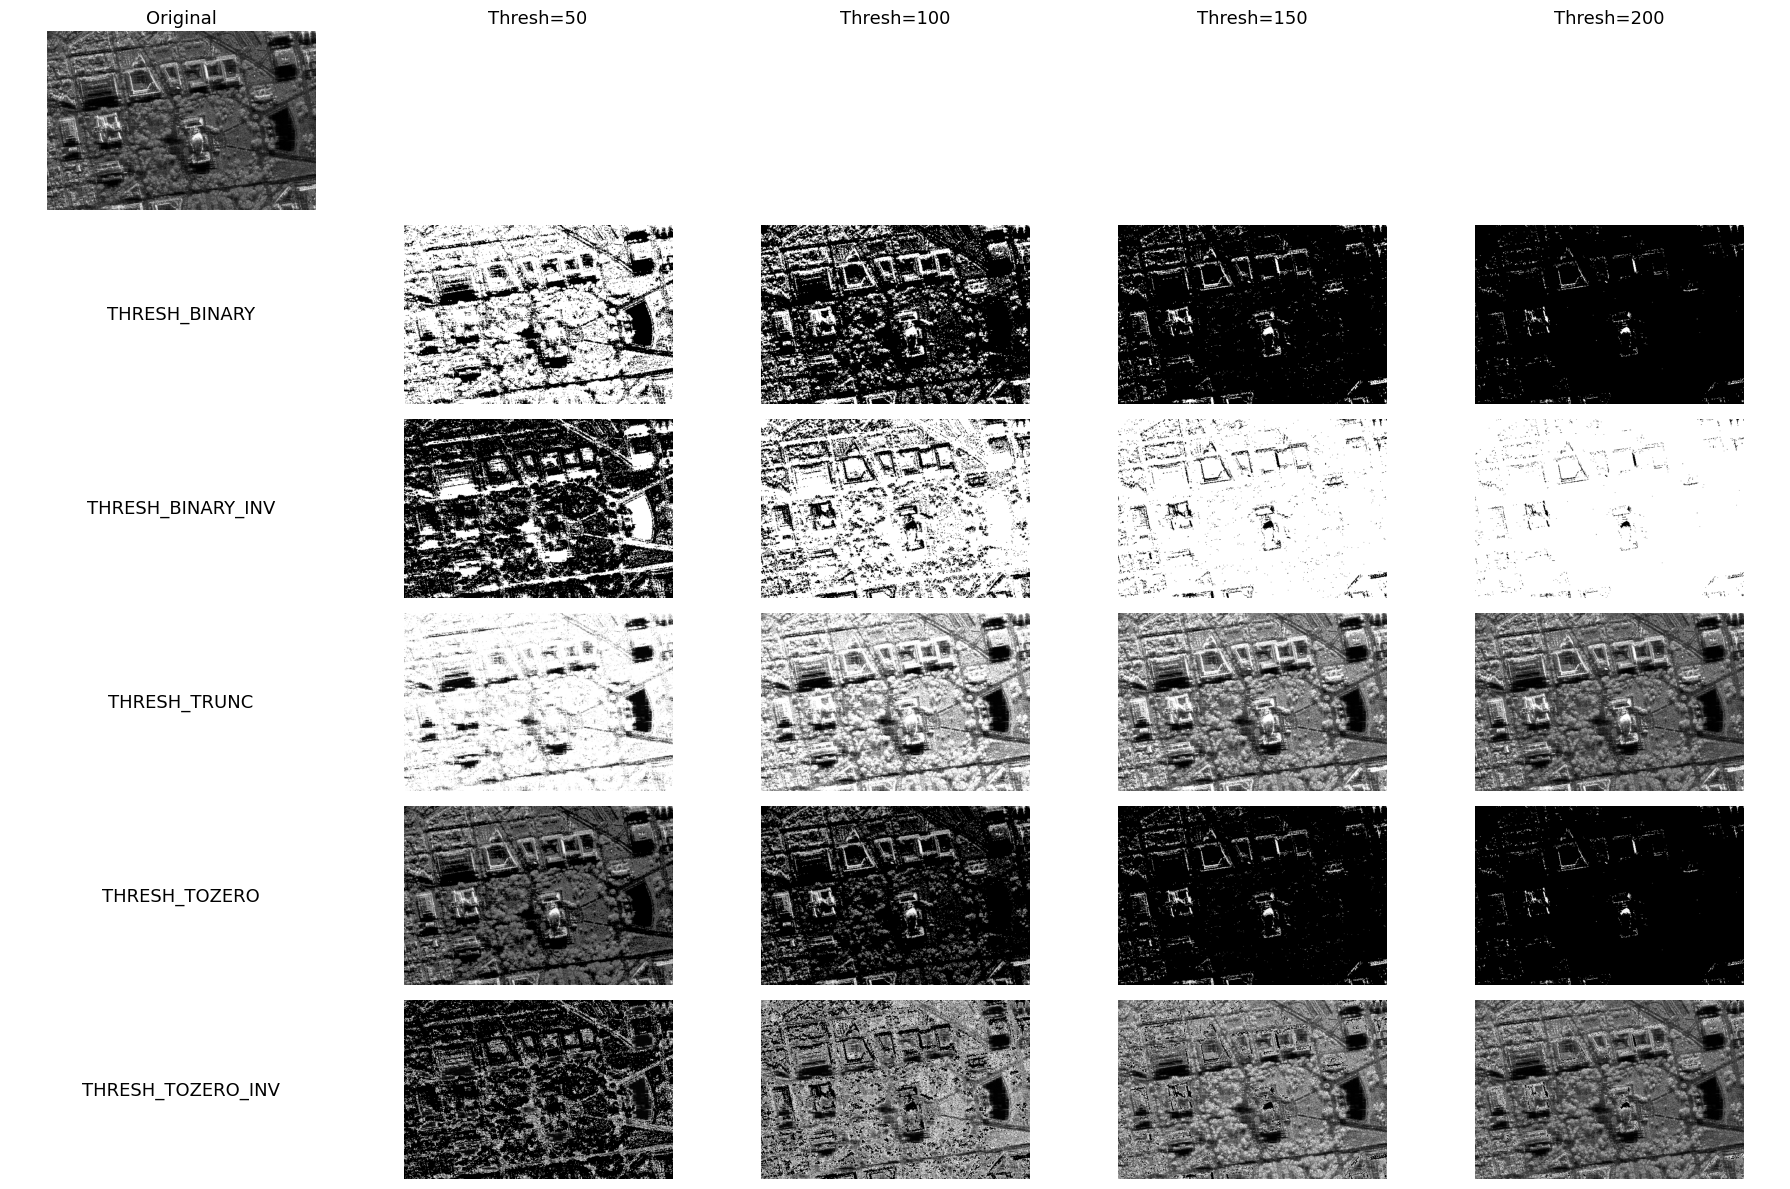

In [503]:
thresholds = [50, 100, 150, 200]
methods = {
    'THRESH_BINARY': cv2.THRESH_BINARY,
    'THRESH_BINARY_INV': cv2.THRESH_BINARY_INV,
    'THRESH_TRUNC': cv2.THRESH_TRUNC,
    'THRESH_TOZERO': cv2.THRESH_TOZERO,
    'THRESH_TOZERO_INV': cv2.THRESH_TOZERO_INV
}

# Получаем список названий методов для сохранения порядка
method_names = list(methods.keys())

fig, axs = plt.subplots(len(methods) + 1, len(thresholds) + 1, figsize=(18, 12))

# Заполняем первую строку (заголовки столбцов)
for j, thresh in enumerate(thresholds):
    axs[0, j + 1].set_title(f'Thresh={thresh}', fontsize=13)
    axs[0, j + 1].axis('off')

# Заполняем первый столбец (названия методов)
for i, method_name in enumerate(method_names):
    axs[i + 1, 0].text(0.5, 0.5, method_name, fontsize=13, ha='center', va='center')
    axs[i + 1, 0].axis('off')

# Отображаем изображения
for i, method_name in enumerate(method_names):
    for j, thresh in enumerate(thresholds):
        _, img_thresh = cv2.threshold(image_gray, thresh, 255, methods[method_name])
        axs[i + 1, j + 1].imshow(img_thresh, cmap='gray')
        axs[i + 1, j + 1].axis('off')

# Отображаем оригинальное изображение в левом верхнем углу
axs[0, 0].imshow(image_gray, cmap='gray')
axs[0, 0].set_title('Original', fontsize=13)
axs[0, 0].axis('off')

plt.tight_layout()
plt.show()